# Data Understanding & Preparation 

In this project we will work with and analyze three different datasets: 
- the first dataset, called _Incidents.csv_ , contains information regarding accidents caused by guns in the United States. There are 28 columns in the dataset, which will be described in detail in the report.
- the second dataset, called _PovertyByStateYear.csv_ contains information about the percentage of poverty in each U.S. state in relation to the current year of the data. The dataset contains the following three columns: state, year, povertyPercentage.
- The third and final dataset, called _YearStateDistrictHouse.csv_ , contains information about the winner of the
congressional elections in the USA, for each year, state and congressional district. In total, the dataset contains 6 columns, with the following information: year, state, congressionalDistrict, party, candidateVotes, totalVotes.

The central component of the data science toolkit is **Pandas library**, and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

## Loading the data set

In these lines we read the .csv files that contain the data. This data will be assigned to Pandas dataframe. After that we give some prints to give us a first visual idea of how the data is represented. 

In [2]:
incidents = pd.read_csv('Data/incidents.csv')
poverty = pd.read_csv('Data/povertyByStateYear.csv') 
district=pd.read_csv('Data/year_state_district_house.csv')

#To display all columns
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

/var/folders/d9/v13wwg9j4639cjvzqgvrv89r0000gn/T/ipykernel_64643/317296430.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv('Data/incidents.csv')


In [3]:
print("Incidents dataset:")
incidents.head() #print the first 5 rows of incidents dataset

Incidents dataset:


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,Adult 18+,Male,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,Adult 18+,Male,62.0,62.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,Adult 18+,Male,248339,707477,761203,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,Adult 18+,Male,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"


In [4]:
print("Poverty by state dataset:")
poverty

Poverty by state dataset:


,state,year,povertyPercentage
0,United States,2020,11.5
1,Alabama,2020,14.8
2,Alaska,2020,11.5
3,Arizona,2020,12.1
4,Arkansas,2020,15.8
...,...,...,...
879,Virginia,2004,9.1
880,Washington,2004,9.8
881,West Virginia,2004,15.0
882,Wisconsin,2004,10.9


In [5]:
print("Year state district house dataset:")
district.tail() #print the last 5 rows of year_state_district_house dataset

Year state district house dataset:


,year,state,congressional_district,party,candidatevotes,totalvotes
10436,2022,WISCONSIN,5,REPUBLICAN,243741,378523
10437,2022,WISCONSIN,6,REPUBLICAN,239231,251999
10438,2022,WISCONSIN,7,REPUBLICAN,209224,338268
10439,2022,WISCONSIN,8,REPUBLICAN,223981,310196
10440,2022,WYOMING,0,REPUBLICAN,132206,198198


At this point we can print the column labels of each datasets.

In [6]:
print(incidents.columns)
print()
print(poverty.columns)
print()
print(district.columns)

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'state_house_district',
       'state_senate_district', 'participant_age1', 'participant_age_group1',
       'participant_gender1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'notes',
       'incident_characteristics1', 'incident_characteristics2'],
      dtype='object')

Index(['state', 'year', 'povertyPercentage'], dtype='object')

Index(['year', 'state', 'congressional_district', 'party', 'candidatevotes',
       'totalvotes'],
      dtype='object')


## Types of Attributes and basic checks

In this section we check the integrity of the data, that is, whether there are empty cells or corrupted data. 
For this purpose we will use the Pandas function **info()**, which checks if there are null values in any column. This function also checks the data type for each column, as well as the number of data types and the number of columns and rows.

In [7]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [8]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [9]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.6+ KB



Instead, in these rows we print the data types in each column of the three data sets.

In [10]:
print("Print the data types of each column of Incidents dataset:")
incidents.dtypes

Print the data types of each column of Incidents dataset:


date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
state_house_district         float64
state_senate_district        float64
participant_age1             float64
participant_age_group1        object
participant_gender1           object
min_age_participants          object
avg_age_participants          object
max_age_participants          object
n_participants_child          object
n_participants_teen           object
n_participants_adult          object
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
notes                         object
incident_characteristics1     object
i

In [11]:
print("Print the data types of each column of PovertyByStateYear dataset:")
poverty.dtypes

Print the data types of each column of PovertyByStateYear dataset:


state                 object
year                   int64
povertyPercentage    float64
dtype: object

In [12]:
print("Print the data types of each column of YearStateDisctrictHouse dataset:")
district.dtypes

Print the data types of each column of YearStateDisctrictHouse dataset:


year                       int64
state                     object
congressional_district     int64
party                     object
candidatevotes             int64
totalvotes                 int64
dtype: object

In the next few lines we create a vector containing the count of null values for each column in our datasets, using the **isnull()** method in combination with the **sum()** method found in the Pandas library.

In [13]:
incidents_null=incidents.isnull().sum()
print(incidents_null)

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


In [14]:
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                 0
year                  0
povertyPercentage    52
dtype: int64


At this point we move on to update the **poverty** DataFrame by removing the 52 rows containing null values in the column index corresponding to the **PovertyPercentage**. In fact, these rows turn out to be useless for the purpose of data analysis, since they only report state and year values. We therefore obtain a new table with no null values, as can be seen from the second check.

In [15]:
poverty=poverty.dropna()
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                0
year                 0
povertyPercentage    0
dtype: int64


In [16]:
district_null=district.isnull().sum()
print(district_null)

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64


# Data Cleaning

## Eliminate duplicates

In the next lines of code we will count for each dataset how many duplicates there are: that is, how many rows are the same as other rows already in the dataset. After this we will move on to modify the tables in each dataset by eliminating the duplicate rows (we keep the first instance of each row). In this way we get tables of smaller size in which each data item appears only once.

In [17]:
incidents_duplicated_rows=incidents.duplicated()
print("The total number of duplicate rows in the Incidents dataset is", incidents_duplicated_rows.sum())
# incidents[incidents_duplicated_rows]
incidents=incidents.drop_duplicates()


The total number of duplicate rows in the Incidents dataset is 253


We can then see that the number of duplicate rows in the Incidents dataset was 253. Of these rows we removed the duplicates using the pandas **drop_duplicates()** command. In the other two datesets, however, there were no duplicate rows, as we can see below.

In [18]:
print("The total number of duplicate rows in the Poverty By State Year dataset is", poverty.duplicated().sum())
print("The total number of duplicate rows in the Year State Disctrict House dataset is", district.duplicated().sum())


The total number of duplicate rows in the Poverty By State Year dataset is 0
The total number of duplicate rows in the Year State Disctrict House dataset is 0


## Modify data with object type 

At this point, after understanding how the datasets are formed, and have removed the duplicates, we will want to eliminate the object types in the datasets which we had seen using the **.info()** command. So as a first step let's remove unnecessary whitespace in the object type columns using the **.strip()** command for each dataset.

In [19]:
incidents = incidents.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
poverty = poverty.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
district = district.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

We can then move on to invert the object data into other types known from the pandas library. Let us leave aside for a moment the first column *date*, which we will move on to edit in a moment. Let us turn instead to transform object (and nonobject) data that should be expressed via a number into data of type numeric (i.e., either int or float). To do this we define a list of columns that should be numeric type data, and apply the **.to_numeric** command to each of them. We use also the feature *errors=* **coerce** to indicate that in the case of data where the algorithm fails to pass the data from object to numeric, then it transforms it into a null data. 

We count also how many data become null (and were not before) during the transformation process for each column. We can see that some columns, especially *min_age_participants*, *avg_age_participants* and *max_age_participants*, have a lot of data that become null during the process. This indicates that these columns were particularly *"dirty "*, that is, they had data inside that was not inherent to the columns (and in fact we contained a lot of strings, compared to the numbers we expected to have).

In [20]:
#define a list of columns to be processed for incidents
columns_to_numeric_incidents = [  'min_age_participants', 'avg_age_participants', 'max_age_participants', 
                        'n_participants_child', 'n_participants_teen', 'n_participants_adult',
                        'participant_age1', 'n_males', 'n_females', 'n_killed', 'n_injured',
                        'n_arrested', 'n_unharmed', 'n_participants', 'congressional_district', 
                        'state_house_district', 'state_senate_district', 'latitude', 'longitude'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in incidents dataframe:")
for columns in columns_to_numeric_incidents:
    nan_before = incidents[columns].isna().sum()
    incidents[columns] = pd.to_numeric(incidents[columns], errors='coerce')
    nan_after = incidents[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

#check that the types in each column we have changed are of type numeric
print("\n")
incidents[columns_to_numeric_incidents].info()

Print how many data we cancelled in the process of transforming from object data to numeric data in incidents dataframe:
min_age_participants : 5753
avg_age_participants : 5889
max_age_participants : 5885
n_participants_child : 5
n_participants_teen : 7
n_participants_adult : 3
participant_age1 : 0
n_males : 0
n_females : 0
n_killed : 0
n_injured : 0
n_arrested : 0
n_unharmed : 0
n_participants : 0
congressional_district : 0
state_house_district : 0
state_senate_district : 0
latitude : 0
longitude : 0


<class 'pandas.core.frame.DataFrame'>
Index: 239424 entries, 0 to 239676
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   min_age_participants    159123 non-null  float64
 1   avg_age_participants    159165 non-null  float64
 2   max_age_participants    159081 non-null  float64
 3   n_participants_child    107938 non-null  float64
 4   n_participants_teen     116536 non-null  float64
 5   n_

In [21]:
#define a list of columns to be processed for poverty
columns_to_numeric_poverty = ['povertyPercentage', 'year'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in PovertyByStateYear dataframe:")
for columns in columns_to_numeric_poverty:
    nan_before = poverty[columns].isna().sum()
    poverty[columns] = pd.to_numeric(poverty[columns], errors='coerce')
    nan_after = poverty[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

#check that the types in each column we have changed are of type numeric
print("\n")
poverty[columns_to_numeric_poverty].info()

Print how many data we cancelled in the process of transforming from object data to numeric data in PovertyByStateYear dataframe:
povertyPercentage : 0
year : 0


<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 883
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   povertyPercentage  832 non-null    float64
 1   year               832 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 19.5 KB


In [22]:
#define a list of columns to be processed for district
columns_to_numeric_district = [  'candidatevotes', 'totalvotes', 'congressional_district', 'year'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in District dataframe:")
for columns in columns_to_numeric_district:
    nan_before = district[columns].isna().sum()
    district[columns] = pd.to_numeric(district[columns], errors='coerce')
    nan_after = district[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

#check that the types in each column we have changed are of type numeric
print("\n")
district[columns_to_numeric_district].info()

Print how many data we cancelled in the process of transforming from object data to numeric data in District dataframe:
candidatevotes : 0
totalvotes : 0
congressional_district : 0
year : 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   candidatevotes          10441 non-null  int64
 1   totalvotes              10441 non-null  int64
 2   congressional_district  10441 non-null  int64
 3   year                    10441 non-null  int64
dtypes: int64(4)
memory usage: 326.4 KB


At this point we would be missing to change the columns with object type data that present text strings within them, for example the column *State*. Actually these columns could safely remain as they are, but we will still use a method that will transform the data in these columns into numeric type data, so that we can calculate correlation on them as well. To do this, however, we will wait until we merge the datesets into a single dataset. Further down in the notebook you will then find this work, and we will explain well there the method we will use to do this.

## Data Cleaning by column

In this last part of data cleaning we are going to take each column of the three dataframes and analyze it, trying to find possible outliers or errors and eliminate them. 

### Incidents - Date

The first thing we check is that the **dates** in the column *date* in the incidents dataframe are consistent with the dataset and well defined (there should not be a date indicating May 41 for example). As a first step, we then take the column with the dates and save them in a separate variable in string type data, using the **.astype(str)** command. This way we can split the data inherent to years, months and days using the **.split()** command. 

Once this is done we move on to print the maximum and minimum numbers that appear in the data inherent in years, months and days. We notice how months and days take acceptable values: months take values between 1 and 12 and days between 1 and 31, as they should. For years, however, we see that the maximum value is 2030, which is wrong since it is a future date.

In [23]:
#divide the dates into separate parts
date_parts = incidents["date"].str.split('-')

#extract the maximum from the year, month and day
year_max = date_parts.str[0].max()
month_max = date_parts.str[1].max()
day_max = date_parts.str[2].max()

#extract the minimum from the year, month and day
year_min = date_parts.str[0].min()
month_min = date_parts.str[1].min()
day_min = date_parts.str[2].min()

print(f"Max year: {year_max}")
print(f"Max month: {month_max}")
print(f"Max day: {day_max}")

print(f"Min year: {year_min}")
print(f"Min month: {month_min}")
print(f"Min day: {day_min}")

Max year: 2030
Max month: 12
Max day: 31
Min year: 2013
Min month: 01
Min day: 01


As we can actually see, the years in the dataframe take values that vary between 2013 and 2030. In particular, all the years from 2013 to 2018 are present, after which there is a ten-year jump and we have the years 2028, 2029, and 2030. Since these three years are clearly wrong, we can assume (and we'd better do so, otherwise the whole dataset would have to be questioned) that the mistake consists only in the bad inclusion of a single digit, specifically the third one (that of the tens digit). In fact, since the data inherent in days and months are not wrong either, it seems reasonable to think that the error is only in that one digit without having to delete all these data.

In [24]:
date_incidents=date_parts.str[0].unique()
date_incidents.sort()
print("We print all the year that appear in the column date in the incidents dataframe:")
print(date_incidents)

We print all the year that appear in the column date in the incidents dataframe:
['2013' '2014' '2015' '2016' '2017' '2018' '2028' '2029' '2030']


So the idea now is to change the tens digit for the wrong years. This could be replaced in two main ways. In fact, we could make it become 2028 or 2018 or 2008. Same for 2029 and 2030. The latter could also take on an extra value, in fact it could become 2000, 2010 or 2020. We therefore make two observations:

- It would make sense to give a sense of continuity to the dataset. Assuming 2028=2008, 2029=2019, 2030=2000 is possible, but it does not seem logical seeing the other years in the dataset that are homogeneously distributed among the years from 2013 to 2018 (and thus consecutive years). Considering this, the most logical choice would be to have this consecutive streak continue and assume 2028=2018, 2029=2019, 2030=2020.

- The other datasets have data that vary between different years, all of which go up to 2020. It would make sense to think that the first dataset also contains data going up to that year. The most logical choice remains the one above.

Given the considerations above, let us change the data by transforming the years as follows: 2028=2018, 2029=2019, and 2030=2020.

In [25]:
incidents['date'] = incidents['date'].str.replace(r'2028-', '2018-')
incidents['date'] = incidents['date'].str.replace(r'2029-', '2019-')
incidents['date'] = incidents['date'].str.replace(r'2030-', '2020-')

Let us now pick up for a moment what was left undone in the previous section. After completing this operation and making sure that the *date* column in the incident dataframe is clean, we can in fact move on to transform its data from object type to datetime type. The datetime type is present in the pandas libraries precisely to handle dates. We then use the **.to_datetime** command, where we again insert the *errors=* **coerce** feature to indicate that in the case of data where the algorithm fails to pass the data from object to datetime, then it transforms it to a null data. Finally, we count how many pieces of data became null (and which were not null before) during the object-to-datetime transformation process.

In [26]:
nan_before=incidents['date'].isna().sum()
incidents['date'] = pd.to_datetime(incidents['date'], errors='coerce')
nan_after=incidents['date'].isna().sum()
print("Print how many data we cancelled in the process of transforming from object data to datetime data:")
print("date :", nan_after - nan_before)
incidents["date"].info()

Print how many data we cancelled in the process of transforming from object data to datetime data:
date : 0
<class 'pandas.core.series.Series'>
Index: 239424 entries, 0 to 239676
Series name: date
Non-Null Count   Dtype         
--------------   -----         
239424 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 MB


### Incidents, poverty and district - State
Let us now check the column of states in the incidents dataframe. In this case, since it is a finite data type (there are 50 federal states in the united states, to which small exceptions are added as we shall see), we can move on to analyze this column in a simple way, printing out the different types of instance. We check so that the U.S. federal states are all present. With the pandas **unique()** command we save all the different instances of states in the Incidents dataset into a list. So, as we can see with the following prints, all 50 federal states of the U.S. are then present, to which an instance is added for the *District of Columbia*, also known as Washington D.C. (the capital city).

In [27]:
column_states=incidents["state"].unique()
column_states.sort()
print("The number of different states in the incidents dataset is:", column_states.size)
print()
print("The states that appear in the state column of the incidents dataset are:")
print(column_states)

The number of different states in the incidents dataset is: 51

The states that appear in the state column of the incidents dataset are:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Now we do the same for the two remaining datasets: PovertyByStateYear and YearStateDistrictHouse. First we move to check in poverty dataset.

In [28]:
column_states=poverty["state"].unique()
column_states.sort()
print("The number of different states in the poverty dataset is:", column_states.size)
print()
print("The states that appear in the state column of the poverty dataset are:")
print(column_states)

The number of different states in the poverty dataset is: 52

The states that appear in the state column of the poverty dataset are:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


As we can see in the poverty dataset there are 52 types of states present. Unlike before, in fact the United States instance is added. In this case we print how many times each data istances appears in the table to see that United States is not a typo. But in fact it is printed exactly the same number of times as the other data. So again the printing of the datum is intentional, and we leave it in the table.

Achtung: This will imply the fact that when we do join tables, there will be 16 rows where most of the data will be empty. These are the occurrences where it happens United States in the *state* column, and in those rows we will have only the information inherent in the poverty table. We may decide later whether to keep those rows or not.

In [29]:
poverty["state"].value_counts()

state
United States           16
Alabama                 16
Nebraska                16
Nevada                  16
New Hampshire           16
New Jersey              16
New Mexico              16
New York                16
North Carolina          16
North Dakota            16
Ohio                    16
Oklahoma                16
Oregon                  16
Pennsylvania            16
Rhode Island            16
South Carolina          16
South Dakota            16
Tennessee               16
Texas                   16
Utah                    16
Vermont                 16
Virginia                16
Washington              16
West Virginia           16
Wisconsin               16
Montana                 16
Missouri                16
Mississippi             16
Hawaii                  16
Alaska                  16
Arizona                 16
Arkansas                16
California              16
Colorado                16
Connecticut             16
Delaware                16
District of Columbia  

Finally we do the same with the district dataframe. In this case we again have 51 different states, the same as in the incidents and poverty dataframes (to which United States is added). These are actually transcribed in block letters, not in lower case as in the other cases, but this will not be a problem: when we do the join of the tables the algorithm will recognize that two equal states are the same even if one is written in lower case and one in block letters.

In [30]:
column_states=district["state"].unique()
column_states.sort()
print("The number of different states in the district dataset is:", column_states.size)
print()
print("The states that appear in the state column of the district dataset are:")
print(column_states)

The number of different states in the district dataset is: 51

The states that appear in the state column of the district dataset are:
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


## Join the dataset

After studying the general characteristics of the three datasets, we can move on to join them, using the column indices in common, to obtain one large table containing all the information from the three datasets, which we call **join_dataset**.

In [31]:
# Add and reorder year column to join poverty table
columns = incidents.columns
incidents['year'] = pd.to_datetime(incidents['date']).dt.year
incidents = incidents[columns.insert(columns.get_loc('date') + 1, 'year')]
join_1 = pd.merge(incidents, poverty, on=['year','state'], how='left')

#join_1.head()

# Workaround to join district table
temp = join_1['state']
join_1['state'] = join_1['state'].str.upper()
join_dataset = pd.merge(join_1, district, on=['year','state','congressional_district'], how='left')
join_dataset['state'] = temp

join_dataset.tail()

,date,year,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,povertyPercentage,party,candidatevotes,totalvotes
239419,2016-01-11,2016,Tennessee,Murfreesboro,Hazelwood Street,35.8624,-86.3695,4.0,37.0,14.0,NaN,Adult 18+,Male,NaN,NaN,-490.0,NaN,0.0,NaN,1.0,0.0,0,1,0.0,0.0,1.0,"Tried to grab gun as it fell, shot self in foot.",Shot - Wounded/Injured,Non-Aggression Incident,12.6,REPUBLICAN,165796.0,254937.0
239420,2019-01-01,2019,New York,Troy,Pawling and Plum Avenues,42.7043,-73.6590,20.0,108.0,44.0,NaN,Adult 18+,Male,NaN,NaN,NaN,NaN,0.0,NaN,2.0,0.0,0,0,0.0,3.0,3.0,NaN,Armed robbery with injury/death and/or evidenc...,NaN,12.3,NaN,NaN,NaN
239421,2017-08-17,2017,Tennessee,Memphis,Barron Ave and Pendleton St,35.1007,-89.9700,9.0,93.0,33.0,58.0,Adult 18+,Male,58.0,58.0,58.0,NaN,0.0,NaN,1.0,0.0,0,1,0.0,0.0,1.0,"Orange Mound, man shot",Shot - Wounded/Injured,NaN,12.1,NaN,NaN,NaN
239422,2016-06-07,2016,Colorado,Colorado Springs,601 Prospect Lake Drive,38.8251,-104.8020,5.0,18.0,11.0,68.0,Adult 18+,Male,68.0,68.0,68.0,NaN,0.0,NaN,2.0,0.0,0,0,1.0,1.0,2.0,Record ID 22972 on Colorado Springs Police Dep...,Non-Shooting Incident,Possession of gun by felon or prohibited person,8.9,REPUBLICAN,225445.0,361993.0
239423,2016-06-12,2016,Pennsylvania,Chester,500 block of West Sixth Street,39.8469,-75.3679,1.0,NaN,NaN,NaN,Adult 18+,Female,560583.0,-825.0,NaN,NaN,0.0,NaN,0.0,1.0,0,1,0.0,0.0,1.0,"shot in chest during arr, birdshot from handgu...",Shot - Wounded/Injured,Armed robbery with injury/death and/or evidenc...,11.5,DEMOCRAT,245791.0,299010.0


Once we have merged the three tables we will have many new null data (due to lack of information). Let's count them using the **.isnull().sum()** command.

In [32]:
null_counts = join_dataset.isnull().sum()
print(null_counts)

date                              0
year                              0
state                             0
city_or_county                    0
address                       16464
latitude                       7923
longitude                      7923
congressional_district        11943
state_house_district          38745
state_senate_district         32314
participant_age1              92048
participant_age_group1        41873
participant_gender1           36123
min_age_participants          80301
avg_age_participants          80259
max_age_participants          80343
n_participants_child         131486
n_participants_teen          122888
n_participants_adult         158444
n_males                       36123
n_females                     36123
n_killed                          0
n_injured                         0
n_arrested                    27393
n_unharmed                    27393
n_participants                    0
notes                         80853
incident_characteristics1   

Finally in this last part we create a second dataframe identical to **join_dataset** using the **copy** command from the library of the same name. After that we also move on to transform the last columns with object-type data, that is, those with string data in them, to numeric-type data. We do this with the **fit_transform** command found in **LabelEncoder**, creating labels that identify each equal string and associate it with the same numeric data. We create a new table this way, so having all numeric data we can do correlation on the whole dataset. We still keep the original table because, for example, being able to distinguish a state by its name, and not treating it as just a number, helps us make considerations about what the data is telling us and make them understandable to everyone.

In [33]:
from sklearn.preprocessing import LabelEncoder
import copy

dataset_without_string = copy.copy(join_dataset)

le = LabelEncoder()
columns_not_numeric = [ 'state', 'city_or_county', 'address', 'participant_age_group1',
                        'participant_gender1', 'notes', 'incident_characteristics1',
                        'incident_characteristics2', 'party']
for column in columns_not_numeric:
    dataset_without_string[column] = le.fit_transform(dataset_without_string[column])

dataset_without_string

,date,year,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,povertyPercentage,party,candidatevotes,totalvotes
0,2015-05-02,2015,14,5425,166064,39.8322,-86.2492,7.0,94.0,33.0,19.0,0,1,19.0,19.0,19.0,NaN,NaN,NaN,1.0,0.0,0,1,0.0,0.0,1.0,76617,41,90,12.3,3,NaN,NaN
1,2017-04-03,2017,38,5685,107657,41.6645,-78.7856,5.0,NaN,NaN,62.0,0,1,62.0,62.0,62.0,NaN,NaN,NaN,1.0,0.0,1,0,0.0,0.0,1.0,124178,40,84,10.5,3,NaN,NaN
2,2016-11-05,2016,22,3022,114611,42.4190,-83.0393,14.0,4.0,2.0,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,812,41,90,11.0,0,244135.0,310974.0
3,2016-10-15,2016,8,12081,5108,38.9030,-76.9820,1.0,NaN,NaN,NaN,0,1,248339.0,707477.0,761203.0,NaN,NaN,NaN,1.0,0.0,0,1,0.0,0.0,2.0,136435,41,90,14.9,3,NaN,NaN
4,2020-06-14,2020,38,9082,145665,40.4621,-80.0308,14.0,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,1,0.0,1.0,2.0,136435,41,27,10.8,2,241688.0,373583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239419,2016-01-11,2016,42,7783,160491,35.8624,-86.3695,4.0,37.0,14.0,NaN,0,1,NaN,NaN,-490.0,NaN,0.0,NaN,1.0,0.0,0,1,0.0,0.0,1.0,77804,41,54,12.6,2,165796.0,254937.0
239420,2019-01-01,2019,32,11632,178476,42.7043,-73.6590,20.0,108.0,44.0,NaN,0,1,NaN,NaN,NaN,NaN,0.0,NaN,2.0,0.0,0,0,0.0,3.0,3.0,136435,3,90,12.3,3,NaN,NaN
239421,2017-08-17,2017,42,7212,142207,35.1007,-89.9700,9.0,93.0,33.0,58.0,0,1,58.0,58.0,58.0,NaN,0.0,NaN,1.0,0.0,0,1,0.0,0.0,1.0,59550,41,90,12.1,3,NaN,NaN
239422,2016-06-07,2016,5,2397,113262,38.8251,-104.8020,5.0,18.0,11.0,68.0,0,1,68.0,68.0,68.0,NaN,0.0,NaN,2.0,0.0,0,0,1.0,1.0,2.0,64986,32,71,8.9,2,225445.0,361993.0


# Correlation

In this section we are concerned with making correlation between data and evaluating the results obtained. As a first step we print the table with the correlation between all the data to give us a general idea, using the **.corr** command.

In [34]:
dataset_without_string.corr(numeric_only=True)

,year,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,povertyPercentage,party,candidatevotes,totalvotes
year,1.000000,-0.015228,0.003885,-0.008670,-0.047564,-0.002475,0.024204,0.018192,-0.001310,0.004811,-0.124188,-0.092329,0.002468,0.005925,0.117340,0.003771,0.003169,0.001566,-0.058720,-0.049948,-0.074036,0.028209,-0.007293,-0.022951,-0.013627,0.043177,-0.027147,-0.028575,-0.239229,0.164734,0.496231,0.530363
state,-0.015228,1.000000,0.036844,0.032784,0.145000,0.203231,-0.058891,0.087541,0.006329,0.013385,-0.001871,-0.008632,-0.002571,0.002374,0.004316,0.002245,-0.000512,0.000361,0.021817,0.022487,-0.011482,-0.009072,0.024972,0.030438,0.023165,-0.049773,0.005033,-0.014624,-0.109689,0.018464,-0.036370,-0.017472
city_or_county,0.003885,0.036844,1.000000,0.009259,-0.037931,-0.069524,0.001057,0.070307,-0.026853,0.027334,0.022554,0.020106,0.001710,0.004902,0.013153,-0.007067,-0.003891,0.001440,0.009522,0.013143,-0.007304,-0.032383,0.025857,0.021571,0.003505,0.080424,-0.034199,-0.012520,0.030327,0.036974,-0.090083,-0.023195
address,-0.008670,0.032784,0.009259,1.000000,-0.004912,0.020056,-0.026917,0.016199,0.015806,0.015057,-0.014082,-0.003567,0.002767,0.001631,0.000556,0.001644,-0.000411,0.003141,-0.032349,-0.009809,-0.070233,-0.051352,0.035305,0.021480,-0.020156,0.042901,-0.049591,-0.045835,0.056326,0.001120,-0.036414,-0.017650
latitude,-0.047564,0.145000,-0.037931,-0.004912,1.000000,-0.056551,-0.259010,-0.237557,0.028585,-0.027926,0.008583,0.016990,-0.004612,-0.001262,-0.043747,0.005024,0.002761,0.000929,-0.038245,-0.037406,-0.080343,-0.011661,0.026213,-0.045867,-0.063502,-0.065237,-0.008609,-0.037941,-0.575731,-0.003094,0.163311,0.174732
longitude,-0.002475,0.203231,-0.069524,0.020056,-0.056551,1.000000,-0.215554,0.236551,0.113332,-0.051459,-0.011663,0.005221,0.001382,-0.000740,-0.025075,0.004917,0.003780,-0.000587,0.003754,-0.016593,-0.062280,0.036830,-0.021465,0.012854,-0.009142,-0.029698,-0.026139,0.026403,-0.042804,-0.006168,0.125804,0.121281
congressional_district,0.024204,-0.058891,0.001057,-0.026917,-0.259010,-0.215554,1.000000,0.228384,0.309651,0.012924,-0.016794,-0.009113,0.000657,0.002039,0.022644,0.006967,-0.000369,-0.002124,0.008071,-0.003562,0.055800,-0.007351,-0.003881,-0.008953,0.014076,0.003601,0.014353,-0.000368,0.012152,-0.074155,-0.224113,-0.209892
state_house_district,0.018192,0.087541,0.070307,0.016199,-0.237557,0.236551,0.228384,1.000000,0.431757,0.008285,0.013960,0.008519,-0.000462,0.003123,0.023097,0.009594,0.010108,-0.001156,0.021889,0.014207,-0.005925,-0.030253,0.022811,0.040394,0.018084,-0.003480,-0.027483,-0.011694,0.155433,0.006753,-0.130209,-0.076041
state_senate_district,-0.001310,0.006329,-0.026853,0.015806,0.028585,0.113332,0.309651,0.431757,1.000000,0.010149,0.020650,0.027016,-0.001348,-0.002393,0.004167,0.008581,-0.004067,-0.002737,-0.005434,-0.004843,-0.010523,-0.044165,0.042447,-0.008648,-0.017726,0.046795,-0.018284,-0.002137,-0.016245,0.018098,-0.083661,-0.010663
participant_age1,0.004811,0.013385,0.027334,0.015057,-0.027926,-0.051459,0.012924,0.008285,0.010149,1.000000,-0.357422,-0.081932,0.874959,0.944479,0.926224,-0.002135,-0.003448,-0.000358,-0.059847,0.067435,0.140161,-0.119299,-0.026186,-0.008706,-0.033667,0.020512,-0.013061,0.009405,0.031597,0.039764,-0.017172,0.013047


We now define two new functions:  

- **get_redundant_pairs**: in this function we transform the correlation matrix into an upper triangular matrix. In fact, the corelation matrix as constructed is symmetric, so it makes sense to eliminate all the equal pairs already analyzed in the top part of the matrix.

- **get_top_abs_correlation**: in this function we instead find and return the *n* pairs with the highest correlation in absolute value,thus considering both positive correlation (when data rise or fall together) and negative correlation (when data in one column goes up the others go down).

In [35]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(numeric_only=True).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

At this point we go on to calculate the 20 pairs with highest absolute correlation using the functions defined earlier and print them.

In [36]:
print("Top Absolute Correlations")
corr_df = dataset_without_string[dataset_without_string.columns.difference(['date'])]
print("-------------------")
print(get_top_abs_correlations(corr_df, 20))
print("-------------------")

#display(corr_df.head())
#corr_df.info()

Top Absolute Correlations
-------------------
n_participants_child    n_participants_teen      0.999999
n_participants_adult    n_participants_child     0.998272
avg_age_participants    participant_age1         0.944479
max_age_participants    participant_age1         0.926224
min_age_participants    participant_age1         0.874959
candidatevotes          totalvotes               0.846081
n_males                 n_participants           0.823160
n_participants_adult    n_participants_teen      0.822889
n_females               participant_gender1      0.719379
participant_age_group1  participant_gender1      0.669111
latitude                povertyPercentage        0.575731
totalvotes              year                     0.530363
n_participants          n_unharmed               0.504979
candidatevotes          year                     0.496231
state_house_district    state_senate_district    0.431757
n_males                 n_unharmed               0.423119
n_arrested              n_

# Latitude and PovertyPercentage

One of the correlations that immediately attracted our attention is the one inherent in *latitude* related to *povertyPercentage*. So now we want to do an analysis on these types of data. First then we create a dataframe that has within it the columns that we are interested in carrying out this analysis.

In [53]:
#select the desired columns
selected_columns = ['state', 'latitude', 'povertyPercentage']

#create a new dataframe with the selected columns
new_dataset = join_dataset[selected_columns]
new_dataset

,state,latitude,povertyPercentage
0,Indiana,39.8322,12.3
1,Pennsylvania,41.6645,10.5
2,Michigan,42.4190,11.0
3,District of Columbia,38.9030,14.9
4,Pennsylvania,40.4621,10.8
...,...,...,...
239419,Tennessee,35.8624,12.6
239420,New York,42.7043,12.3
239421,Tennessee,35.1007,12.1
239422,Colorado,38.8251,8.9


We understand how many and which data are null in this dataset.

In [54]:
null_counts = new_dataset.isnull().sum()

print(null_counts)

state                   0
latitude             7923
povertyPercentage       0
dtype: int64


And at this point, since the only null data are about 8000 data pertaining to latitude, and the total number of data is much greater than 8000, we can believe that eliminating these data should not change the final result of our analysis. This is also because our only other possible solution would be to approximate these data, which is a super possible thing to do, and also accurately, if we take into account the city to which each data item relates. But given the small number of null data, it is not worth doing this expensive operation.

In [58]:
new_dataset = new_dataset.dropna(subset=['latitude'])

At this point we move on to clustering on latitudes to create a number of meaningful clusters into which to divide the united states to study how poverty varies with latitude. To do this we use the **k-Means** method found in the **sklearn.cluster** library. 

In order to use this method first it would be useful to try to figure out what the optimal number of clusters is. The idea then to figure out what is the ideal number of clusters is to use a method, called the **Elbow Method**. This involves training the k-Means model with a range of cluster values and calculating the inertia (sum of the square distances of the instances from the cluster center) for each cluster value. Once this is done, one then looks for the point at which the inertia begins to change most slowly, creating an elbow curve. This point is considered the optimal number of clusters.

In general, we will want to create a number of clusters that give us an indicative idea of how poverty varies by latitude. One cluster is certainly not indicative, while 2 might already make sense if we think about the simple north-south division. Similarly, 20 clusters is certainly a lot. So let's vary the number of clusters in the Elbow Method between 2 and 10 and see which is best.

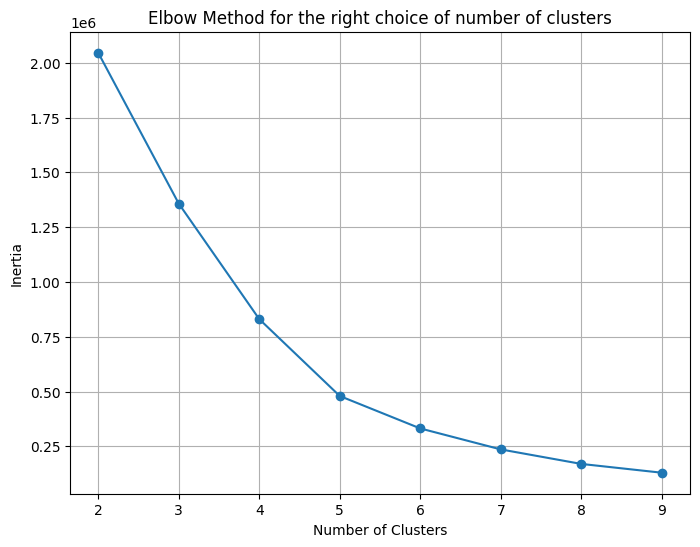

In [140]:
from sklearn.cluster import KMeans

num_clusters = list(range(2, 10))

# Compute inertia for each cluster
inertia = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(new_dataset[['latitude']])
    inertia.append(kmeans.inertia_)

# Plot the inertia's values for each cluster
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method for the right choice of number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

From the graph printed above we see that indeed 5 is the ideal number of clusters if the Elbow Method is followed. At this point we then use the k-Means method where k=5. Once this is done we add a new column in the dataframe, where each row is associated with the cluster to which this row belongs. Finally we print this new dataframe.

In [142]:
#ignore the warnings of "SettingWithCopyWarning"
pd.options.mode.chained_assignment = None  

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
new_dataset['cluster'] = kmeans.fit_predict(new_dataset[['latitude']])

new_dataset.head()

,state,latitude,povertyPercentage,cluster
0,Indiana,39.8322,12.3,0
1,Pennsylvania,41.6645,10.5,2
2,Michigan,42.4190,11.0,2
3,District of Columbia,38.9030,14.9,0
4,Pennsylvania,40.4621,10.8,0


From that dataframe we create a new one that combines all the data that belong to the same cluster and has the following columns:
- *cluster*: the number indicating the cluster
- *state*: a set that contains all the states that occur in the cluster
- *povertyPercentage*: the mean calculated over all the *povertyPercentage* data that in the old table belonged to the cluster
- *latitude*: the median computed over all the *latitude* data that in the old table belonged to the cluster

Then we sort the dataframe following latitude in an ascending order: we will then have first the data referring to the cluster with lower latitudes and then those with higher latitudes.

In [143]:
result = new_dataset.groupby('cluster').agg({
    'state': set,  #converts occurrences of "state" to a set
    'povertyPercentage': 'mean',  #compute the mean of "povertyPercentage"
    'latitude': 'median'  #compute the median of "latitude"
}).reset_index()

#Name and sort the columns of result dataframe
result.columns = ['cluster', 'state', 'povertyPercentage', 'latitude']
result = result.sort_values(by='latitude')

display(result)

,cluster,state,povertyPercentage,latitude
3,3,"{Hawaii, Louisiana, Texas, Arizona, Florida, M...",14.970874,29.8348
1,1,"{Texas, California, Georgia, Mississippi, Dela...",14.266653,34.2490
0,0,"{Kansas, Texas, District of Columbia, Colorado...",11.413222,39.2940
2,2,"{Idaho, New Hampshire, Iowa, California, South...",10.693457,42.2588
4,4,{Alaska},11.957331,61.2202


At this point we rename the clusters to give us an idea of what they indicate. Indeed we see how the first cluster in the table will represent the one with the lowest latitude, and so it makes sense to denote it with "*South*," since it indicates data referring to the southern United States. Similarly, we can do the same with the other clusters. Only note to add: the last cluster references all and only data from the state of Alaska (as can be seen below its latitude is much further north than the rest of the states). We therefore decide to rename the last cluster with the specific term "*Alaska*". In fact, this choice also has another reason, which we will explain better in a moment.

In [144]:
#rename the columns of result dataframe
new_cluster_name=['South', 'South-central', 'North-central', 'North', 'Alaska']
result['cluster'] = new_cluster_name
result

,cluster,state,povertyPercentage,latitude
3,South,"{Hawaii, Louisiana, Texas, Arizona, Florida, M...",14.970874,29.8348
1,South-central,"{Texas, California, Georgia, Mississippi, Dela...",14.266653,34.2490
0,North-central,"{Kansas, Texas, District of Columbia, Colorado...",11.413222,39.2940
2,North,"{Idaho, New Hampshire, Iowa, California, South...",10.693457,42.2588
4,Alaska,{Alaska},11.957331,61.2202


Finally, we move on to print two bar graphs that make us understand how the trend of *povertyPercentage* varies in relation to *latitude*. In detail:

  - Graph (a) (left) has on the x-axis the data referring to latitude, on the y-axis those referring to the poverty percentage. The bars refer to each cluster. 
  - Graph (b) (right) has on the x-axis the data referring to latitude, on the y-axis simply the clusters spaced consistently apart. The reason for printing this second graph is aesthetic: in fact, it is redundant with the first one, but more pleasing to the eye, and it is also easier to understand for those not concerned with the dataset, having the cluster names printed on the x-axis.

Both graphs show us the same thing: the percentage of poverty falls from the south going north, so on average the states in the south are poorer than those in the south. This trend is broken only by the state of Alaska (the last cluster). In fact, this cluster has a higher average poverty rate than the north and north-central, despite having a higher latitude.

To better understand this situation we believe it may help to see the first graph. We can actually see how the *Alaska* cluster is in latitude far away from the other clusters. This can then explain to us why the latter cluster reverses the trend of the former: it is simply too far away from them to behave in the same way. To explain it better, and also justify the choice of calling the last cluster by the specific name *Alaska* unlike the others, we have this: despite being a federal state of the United States Alaska behaves differently. In fact between Alaska and the rest of US there is Canada and thousands of miles, and we would not be surprised if Alaska behaved more like the Canadian states than the US states. 

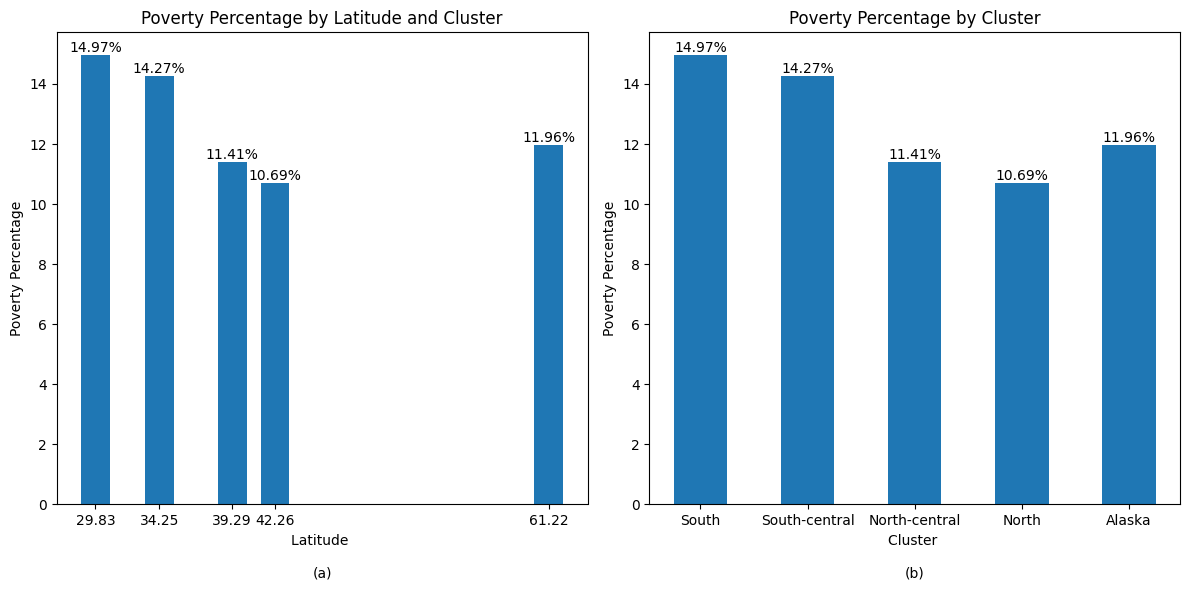

In [152]:
plt.figure(figsize=(12, 6))

#first subplot on the left
plt.subplot(1, 2, 1)
plt.bar(result['latitude'], result['povertyPercentage'], width=2)
plt.xlabel('Latitude \n\n(a)')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percentage by Latitude and Cluster')

#add values of povertyPercentage on the bars
for x, y in zip(result['latitude'], result['povertyPercentage']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')

plt.xticks(result['latitude'])

#second subplot on the right
plt.subplot(1, 2, 2)

#create a list of cluster labels
labels_cluster = [f'{cluster}' for cluster in result['cluster']]

#width and positions of bars
width_bars = 0.5
position_bars = range(len(labels_cluster))

plt.bar(position_bars, result['povertyPercentage'], width=width_bars)
plt.xlabel('Cluster \n\n(b)')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percentage by Cluster')

plt.xticks(position_bars, labels_cluster)
plt.xticks(rotation=0, fontsize=10)

#add values of povertyPercentage on the bars
for x, y in zip(position_bars, result['povertyPercentage']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()

# Geo Data Visualization

The idea would be to represent on a map of the U.S. and in a simple graphical way which cities and states are the most dangerous. For cities, the idea would be to use a clustering algorithm, using a metric that takes into account latitude and longitude. For states, on the other hand, just merge the data for each state, counting how many instances of each state appear.

## Data creation and cleaning.

At first we need to create the subtable that we are interested in and do some preliminary cleaning. In fact, at first we can eliminate all rows that do not have latitude and longitude information, since they cannot be represented graphically. (We might actually think about doing inference to approximate the value.)

In [40]:
geo_incidents=incidents[['state', 'city_or_county', 'latitude', 'longitude']]
geo_incidents=geo_incidents.dropna(subset=['latitude'])

#check that there are no null valus in dataframe
geo_incidents.isnull().sum()

state             0
city_or_county    0
latitude          0
longitude         0
dtype: int64

Also, through a test graphical representation, we noticed how 4 data are outliers, in that their longitude and latitude that is referred to an American state actually falls on Asian soil. Again we are going to eliminate these data as they are very few compared to the total, although we could well approximate their latitude and longitude.

In [41]:
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 37.6499) & (geo_incidents['longitude']==97.4331)].index)
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 40.8509) & (geo_incidents['longitude']==96.7591)].index)
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 38.7487) & (geo_incidents['longitude']==90.37)].index)
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 35.2137) & (geo_incidents['longitude']==80.9491)].index)

## Geo Visualization by cities

We then begin by wanting to give a graphical representation of the number of accidents that occur in each city. We first create a table in which we merge all the occurrences of incidents that happen in the same city and create a new column, called **number_of_incidents**, that counts for each city how many times it was present in the original dataframe (i.e., how many crimes occurred in that city). At this point we also update the **latitude** and **longitude** columns, taking for each city as its latitude (and likewise as its longitude), the median of all the latitudes associated with that specific city in the original dataframe. We take the median and not the mean because we would like a point that geographically reflects the center of the city.

In [42]:
# Calculate the incident count for each 'state' and 'city_or_county' pair.
city_state_incidents = geo_incidents.groupby(['city_or_county', 'state'])['latitude'].count().reset_index()

# Rename the 'latitude' column to 'number_of_incidents'
city_state_incidents.rename(columns={'latitude': 'number_of_incidents'}, inplace=True)


average_location = geo_incidents.groupby(['state', 'city_or_county'])[['latitude', 'longitude']].median().reset_index()

# Merge incident count and location information.
geo_cities_incidents = pd.merge(city_state_incidents, average_location, on=['state', 'city_or_county'])
geo_cities_incidents = geo_cities_incidents.sort_values(by='number_of_incidents', ascending=False)
geo_cities_incidents


,city_or_county,state,number_of_incidents,latitude,longitude
2776,Chicago,Illinois,10416,41.83625,-87.6734
737,Baltimore,Maryland,3843,39.30270,-76.6286
16150,Washington,District of Columbia,3075,38.89350,-76.9902
10941,New Orleans,Louisiana,2953,29.96880,-90.0613
12158,Philadelphia,Pennsylvania,2857,39.99390,-75.1565
...,...,...,...,...,...
11406,Ocean Springs (Latimer),Mississippi,1,30.48310,-88.8619
5342,Fort Gaines,Georgia,1,31.61200,-85.0462
11404,Ocean Shores,Washington,1,46.95950,-124.1580
5343,Fort Gay,West Virginia,1,38.00170,-82.5037


At this point we use the **plotly** package to give a graphical representation of the data in the table above. Each city will be associated with a circle. This circle will be larger as the **number_of_incidents** referring to the city that the circle describes increases. Likewise, the colors of these circles will vary from yellow, to indicate cities with low numbers of crimes, to red, to indicate cities with more crimes.

In [43]:
import plotly.express as px

color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(geo_cities_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "city_or_county", "state", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Cluster creation

We now move on to the creation of the clusters. To do this we use the **k-Means** method found in the **sklearn.cluster** library. In order to use this method first it would be useful to try to figure out what the optimal number of clusters is. The idea then to figure out what is the ideal number of clusters is to use a method, called the **Elbow Method**. This involves training the k-Means model with a range of cluster values and calculating the inertia (sum of the square distances of the instances from the cluster center) for each cluster value. Once this is done, one then looks for the point at which the inertia begins to change most slowly, creating an elbow curve. This point is considered the optimal number of clusters. In general, we will want to create a number of clusters that gives us a signficant idea of how incidents develop in the United States, so neither include too many cities, nor too few. Therefore, the range of cluster values we apply to the method is from 10 to 100.

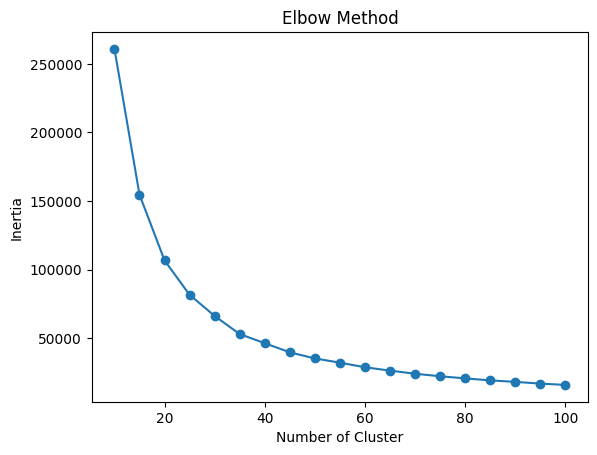

In [44]:
from sklearn.cluster import KMeans

# Select the column of latitude and longitude
coordinates = geo_cities_incidents[['latitude', 'longitude']]

inertias = []
k_values=range(10, 101, 5)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(coordinates)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()

Once we have then identified the best number of clusters, which would be 42, we can apply the k-Means method one last time and obtain a clustering of our cities. We thus add to the new tables a new column in which we add the information about what number of clusters each data item belongs to.

In [45]:
#the number of cluster obtained from elbow method
num_clusters = 42  
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(coordinates)

#add cluster labels to the original DataFrame
geo_cities_incidents['cluster'] = kmeans.labels_
geo_cities_incidents


,city_or_county,state,number_of_incidents,latitude,longitude,cluster
2776,Chicago,Illinois,10416,41.83625,-87.6734,14
737,Baltimore,Maryland,3843,39.30270,-76.6286,9
16150,Washington,District of Columbia,3075,38.89350,-76.9902,9
10941,New Orleans,Louisiana,2953,29.96880,-90.0613,17
12158,Philadelphia,Pennsylvania,2857,39.99390,-75.1565,28
...,...,...,...,...,...,...
11406,Ocean Springs (Latimer),Mississippi,1,30.48310,-88.8619,17
5342,Fort Gaines,Georgia,1,31.61200,-85.0462,10
11404,Ocean Shores,Washington,1,46.95950,-124.1580,2
5343,Fort Gay,West Virginia,1,38.00170,-82.5037,16


At this point we create a new dataframe from **geo_city_incidents** in which we simply group all the data belonging to the same cluster. For each cluster we set as "latitude" (and therefore as "longitude") the median of all the "latitudes" in the data that belong to the cluster. Also as "number_of_incidents" the sum of all "number_of_incidents" present in the cities that belong to the cluster.

In [46]:
# Raggruppa il DataFrame originale 'df' per il numero di cluster
grouped = geo_cities_incidents.groupby('cluster')

# Calcola la somma di "number_of_incidents" per ciascun cluster
sum_incidents = grouped['number_of_incidents'].sum()

# Calcola la mediana di latitudine e longitudine per ciascun cluster
median_latitude = grouped['latitude'].median()
median_longitude = grouped['longitude'].median()

# Crea un nuovo DataFrame con le colonne richieste
new_geo_cities_incidents = pd.DataFrame({
    'cluster': sum_incidents.index,
    'number_of_incidents': sum_incidents.values,
    'latitude': median_latitude.values,
    'longitude': median_longitude.values
})

new_geo_cities_incidents

# Ora 'new_geo_cities_incidents' contiene il nuovo DataFrame con le colonne richieste

,cluster,number_of_incidents,latitude,longitude
0,0,2228,45.317700,-93.678300
1,1,10486,39.160025,-84.677875
2,2,4692,46.314300,-122.534000
3,3,3748,34.584900,-92.513600
4,4,830,44.554675,-69.615575
5,5,122,61.518800,-160.949000
6,6,9117,34.066200,-118.064000
7,7,9029,29.008300,-82.174900
8,8,277,20.888250,-156.416500
9,9,13242,39.282725,-76.808075


Finally we can move on to printing the result obtained on the map of the United States, exactly as we had printed previously for the cities.

In [47]:
color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(new_geo_cities_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "cluster", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Geo Visualization by states.

Now we move to visualize the incidents refferred to states. We have already seen previously, in data cleaning, that the number of states is exact.

At this point so we create a table containing only 51 rows. In fact, we will take the previously created **geo_cities_incidents** DataFrame and merge all rows that report information about crimes that occurred in the same state. We also update the **number_of_incidents** column, which counts the sum of the number of crimes that occurred in all cities for each state.

Finally, we associate these two columns with two other columns containing latitude and longitude information. With each state we associate as latitude (and equivalently longitude) the median of all latitudes in **geo_cities_incidents** that relate to the same state. We take the median and not the mean because we want to get a point that is geographically in the center of the state, thus not having to count if more crimes occur at one point in the same state than at another point.

In [49]:
state_incidents = geo_cities_incidents.groupby('state')['number_of_incidents'].sum().reset_index()
state_incidents.columns = ['state', 'number_of_incidents']
average_location_state = geo_cities_incidents.groupby('state')[['latitude', 'longitude']].median().reset_index()
geo_state_incidents=pd.merge(state_incidents, average_location_state, on='state')
geo_state_incidents


,state,number_of_incidents,latitude,longitude
0,Alabama,5372,33.225900,-86.680600
1,Alaska,1289,61.542200,-151.201000
2,Arizona,2264,33.507600,-111.789000
3,Arkansas,2754,35.263800,-92.399100
4,California,15981,36.322125,-119.789500
5,Colorado,3055,39.441325,-105.101500
6,Connecticut,2987,41.574950,-72.678150
7,Delaware,1643,39.178825,-75.575550
8,District of Columbia,3081,38.866350,-76.999650
9,Florida,14597,28.306800,-81.719400


Finally we use **plotly** in the same way we did above in the case of cities to get the following result.

In [50]:
color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(geo_state_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "state", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()